In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
import pandas as pd

# Attempt to read the CSV file with error handling
df = pd.read_csv('/content/PMD islamabad-merged.csv', on_bad_lines='warn')
df.head()


,time,temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),humidity at 000 utc %,humidity at 000 utc %.1,pressure at 1200 utc%,windspeed at 1200utc%
0,01/01/2021,21.5,-0.5,0,91,43,955.1,0
1,02/01/2021,21.0,-0.5,0,91,37,955.6,0
2,03/01/2021,20.5,0.0,0,92,75,952.6,0
3,04/01/2021,19.0,5.5,0,94,71,956.4,2
4,05/01/2021,18.0,8.0,6,94,72,954.3,0


In [ ]:
# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

         time  temperature_2m_max (°C)  temperature_2m_min (°C) rain_sum (mm)  \
0  01/01/2021                     21.5                     -0.5             0   
1  02/01/2021                     21.0                     -0.5             0   
2  03/01/2021                     20.5                      0.0             0   
3  04/01/2021                     19.0                      5.5             0   
4  05/01/2021                     18.0                      8.0             6   

   humidity at 000 utc %  humidity at 000 utc %.1  pressure at 1200 utc%  \
0                     91                       43                  955.1   
1                     91                       37                  955.6   
2                     92                       75                  952.6   
3                     94                       71                  956.4   
4                     94                       72                  954.3   

   windspeed at 1200utc%  
0                      0  
1 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/d4sxustk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/5u8oirbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30037', 'data', 'file=/tmp/tmp3is0eugj/d4sxustk.json', 'init=/tmp/tmp3is0eugj/5u8oirbc.json', 'output', 'file=/tmp/tmp3is0eugj/prophet_modelz06ldopi/prophet_model-20250128100226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (°C)  temperature_2m_min (°C) rain_sum (mm)  \
0  01/01/2021                     21.5                     -0.5             0   
1  02/01/2021                     21.0                     -0.5             0   
2  03/01/2021                     20.5                      0.0             0   
3  04/01/2021                     19.0                      5.5             0   
4  05/01/2021                     18.0                      8.0             6   

   humidity at 000 utc %  humidity at 000 utc %.1  pressure at 1200 utc%  \
0                     91                       43                  955.1   
1                     91                       37                  955.6   
2                     92                       75                  952.6   
3                     94                       71                  956.4   
4                     94                       72                  954.3   

   windspeed at 1200utc%  
0                      0  
1 

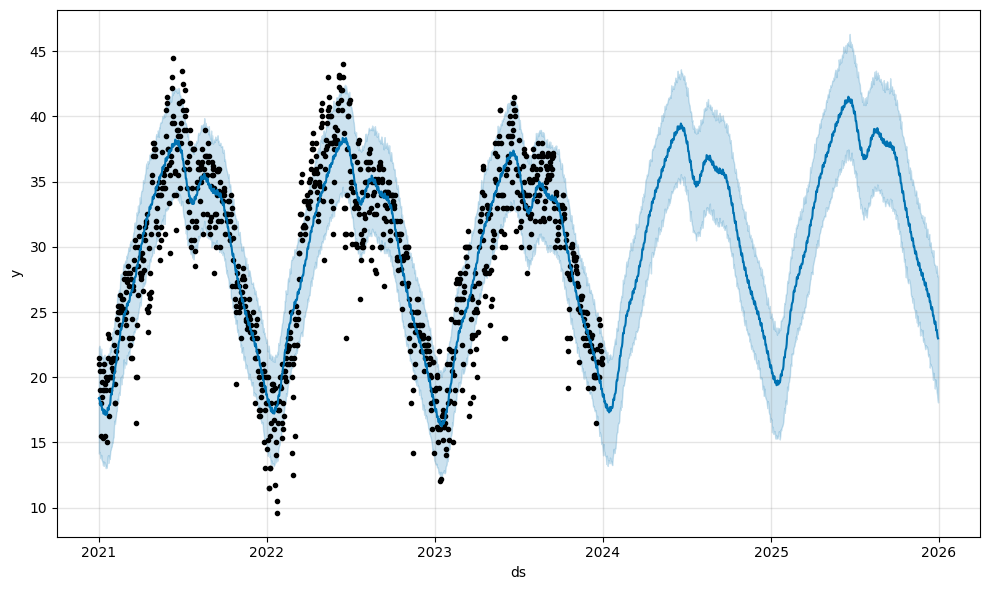

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with the correct delimiter
df = pd.read_csv('/content/PMD islamabad-merged.csv', delimiter=',')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')  # Ensure the date format is correct

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=730)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/forecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/forecast_results.csv'")




1. Historical Data (Black Dots):
These dots are plotted to show the actual observed values for the time series up to the present day. This allows you to see how well the model's forecast aligns with the past observations.

2. Forecasted Values (Blue Line):
This line represents the predicted values by the Prophet model. It continues from the last point of the historical data into the future for the specified forecast period (30 days in your case).

3. Uncertainty Intervals (Shaded Area):
The shaded area around the blue line represents the 80% and 95% uncertainty intervals by default. These intervals show the range within which the true future values are likely to fall. A wider shaded area indicates greater uncertainty in the predictions.

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/forecast_results.csv')

# Check the columns in df_actual
print("Columns in df_actual:", df_actual.columns)

# Ensure the date column is correctly formatted
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # No need to specify the format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")




Columns in df_actual: Index(['ds', 'yhat'], dtype='object')
MAE: 6.737905252897501e-16
MSE: 3.103902799490297e-30
RMSE: 1.7617896581289995e-15


MAE: 2.3743606182401398
MSE: 9.673701765080335
RMSE: 3.1102575078408434


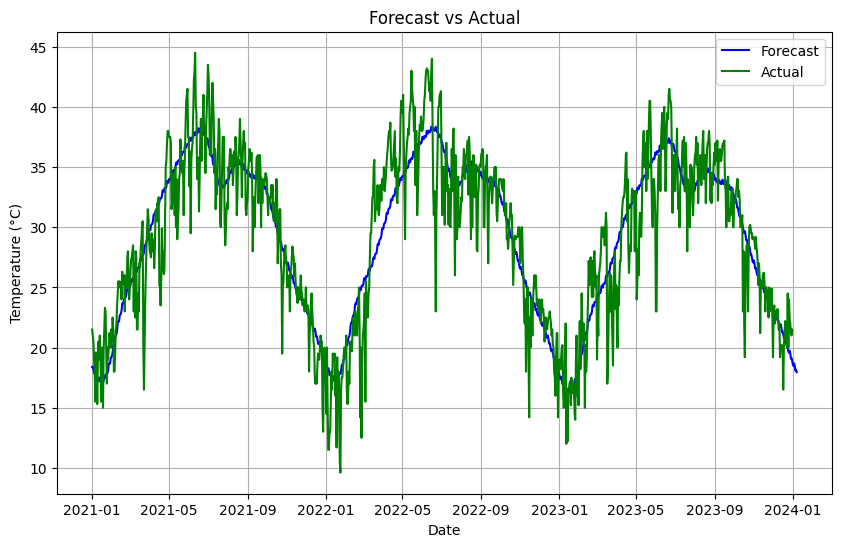

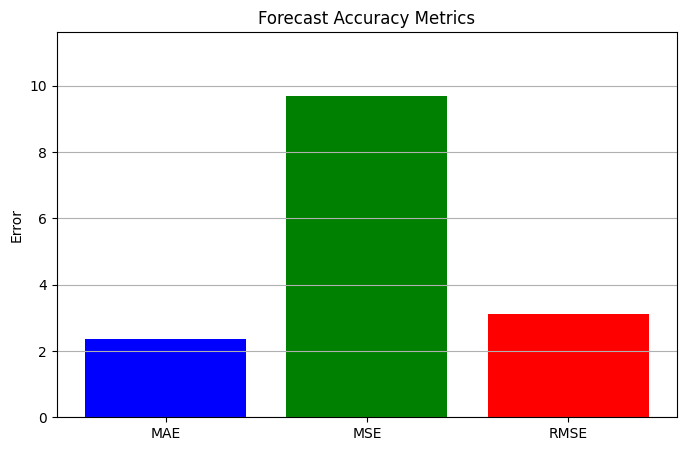

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/PMD islamabad-merged.csv')
df_actual.rename(columns={'time': 'ds', 'temperature_2m_max (°C)': 'y'}, inplace=True)  # Rename 'time' to 'ds' and select the target column
df_actual['ds'] = pd.to_datetime(df_actual['ds'], format='%d/%m/%Y')  # Ensure 'ds' is datetime format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'y']], on='ds', how='inner')

# Calculate metrics using 'yhat' from forecast and 'y' from actuals
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting the forecast and metrics
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df_actual['ds'], df_actual['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()



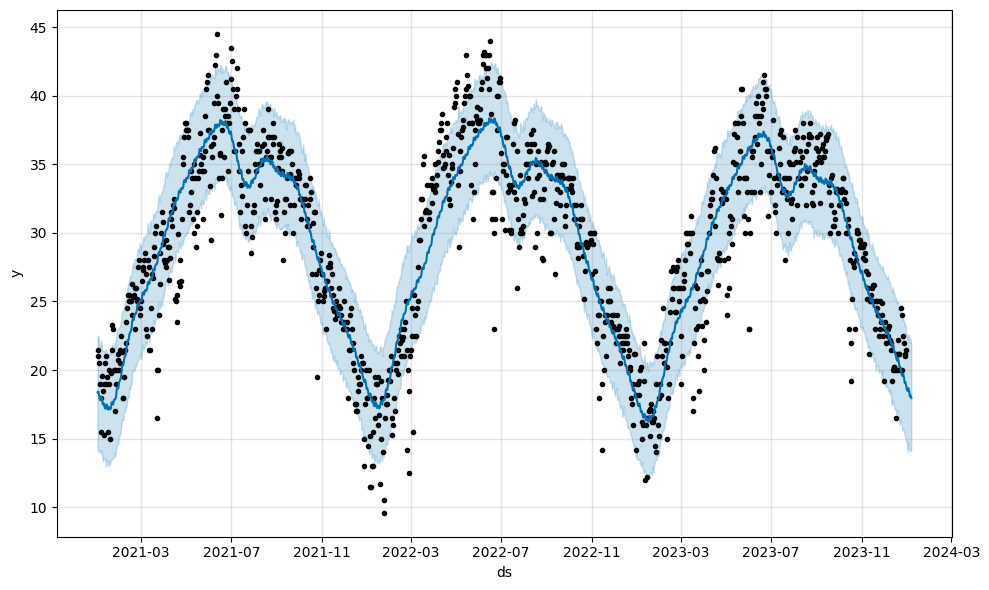

In [ ]:
fig1 = m.plot(forecast)



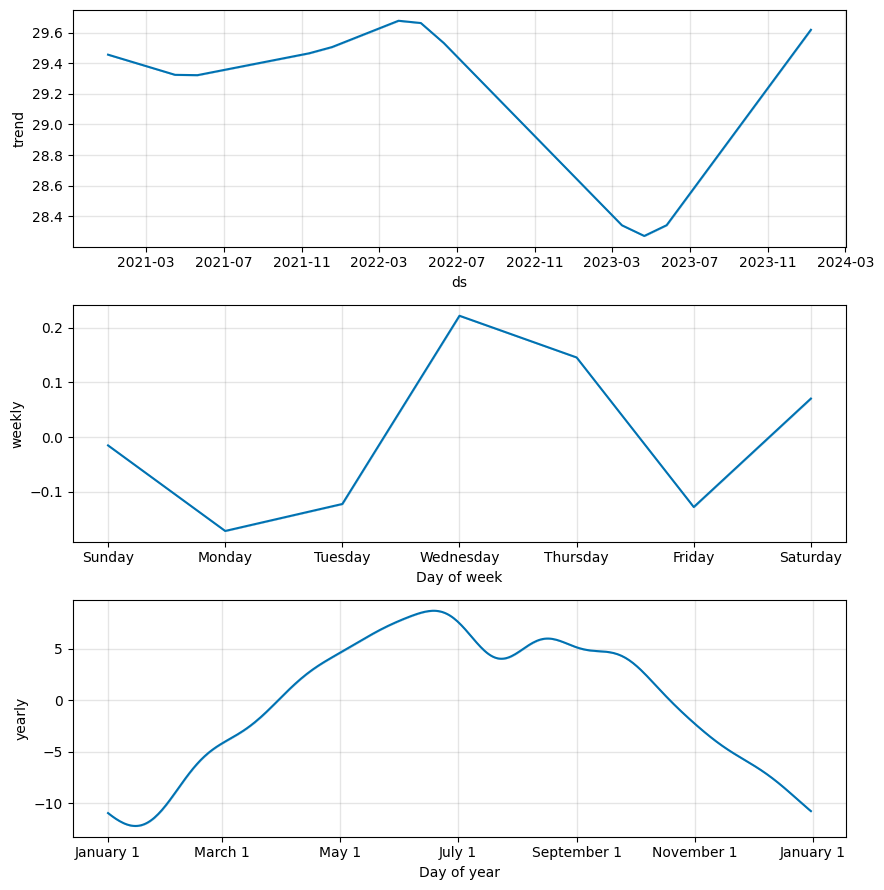

In [ ]:
fig2 = m.plot_components(forecast)



In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)



/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
# Initialize and fit the Prophet model
m = Prophet(
    changepoint_prior_scale=0.05,  # Increase to make the model more flexible
    seasonality_prior_scale=10.0,  # Increase to fit stronger seasonality
    holidays_prior_scale=10.0,     # Increase to give more weight to holidays
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)

# Add custom seasonality if needed
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model using the 'df' DataFrame with the renamed columns
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/ioy8_crw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/sjd6270w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52315', 'data', 'file=/tmp/tmp3is0eugj/ioy8_crw.json', 'init=/tmp/tmp3is0eugj/sjd6270w.json', 'output', 'file=/tmp/tmp3is0eugj/prophet_model4537f6rd/prophet_model-20250128100315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Cross-validation

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='365 days')

df_p = performance_metrics(df_cv)
print(df_p)


# Option 1: Shorten the horizon
#df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='180 days')

# Option 2: Shorten the initial training period
#df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='365 days')

# Option 3: Increase the period between cutoffs (if feasible for your data)
#df_cv = cross_validation(m, initial='730 days', period='365 days', horizon='365 days')


INFO:prophet:Making 3 forecasts with cutoffs between 2022-01-05 00:00:00 and 2022-12-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/rop779qn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/inkd0u7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27728', 'data', 'file=/tmp/tmp3is0eugj/rop779qn.json', 'init=/tmp/tmp3is0eugj/inkd0u7l.json', 'output', 'file=/tmp/tmp3is0eugj/prophet_modelvlbh71ii/prophet_model-20250128100403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/p1058iv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3is0eugj/nfc_294z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

     horizon        mse      rmse       mae      mape     mdape     smape  \
0    37 days  12.720489  3.566579  2.760567  0.127829  0.113494  0.124075   
1    38 days  12.103975  3.479077  2.678004  0.123453  0.104180  0.120279   
2    39 days  11.999294  3.464000  2.667691  0.121877  0.104180  0.119042   
3    40 days  11.888384  3.447954  2.644127  0.120576  0.102420  0.117871   
4    41 days  12.076066  3.475063  2.659427  0.122124  0.102420  0.118631   
..       ...        ...       ...       ...       ...       ...       ...   
324 361 days  31.426147  5.605903  4.462071  0.176452  0.160695  0.180720   
325 362 days  32.104758  5.666106  4.528015  0.179853  0.166267  0.184874   
326 363 days  31.992270  5.656171  4.539722  0.181224  0.166590  0.187092   
327 364 days  32.170767  5.671928  4.576570  0.183644  0.168127  0.190428   
328 365 days  32.406830  5.692700  4.605948  0.185974  0.174038  0.193796   

     coverage  
0    0.663609  
1    0.681957  
2    0.691131  
3    0.6972

ALL OF THE ABOVE RESULTS ARE FOR TEMPERATURE

In [ ]:
#FOR THE PRECIPITATION

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc46kdp7/3_6u663x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc46kdp7/sj6hblcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48647', 'data', 'file=/tmp/tmpbc46kdp7/3_6u663x.json', 'init=/tmp/tmpbc46kdp7/sj6hblcq.json', 'output', 'file=/tmp/tmpbc46kdp7/prophet_modelazpx_kkn/prophet_model-20240705052051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  02/06/2024                     41.0                     25.9   
1  03/06/2024                     41.6                     26.7   
2  04/06/2024                     38.4                     26.2   
3  05/06/2024                     34.2                     24.3   
4  06/06/2024                     35.0                     21.6   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           40.6                           24.5   
1                           42.2                           24.8   
2                           40.6                           25.2   
3                           32.6                           23.3   
4                           36.9                           21.7   

   precipitation_sum (mm)  rain_sum (mm)  precipitation_hours (h)  \
0                     0.0            0.0                        0   
1                     0.0            0.0                

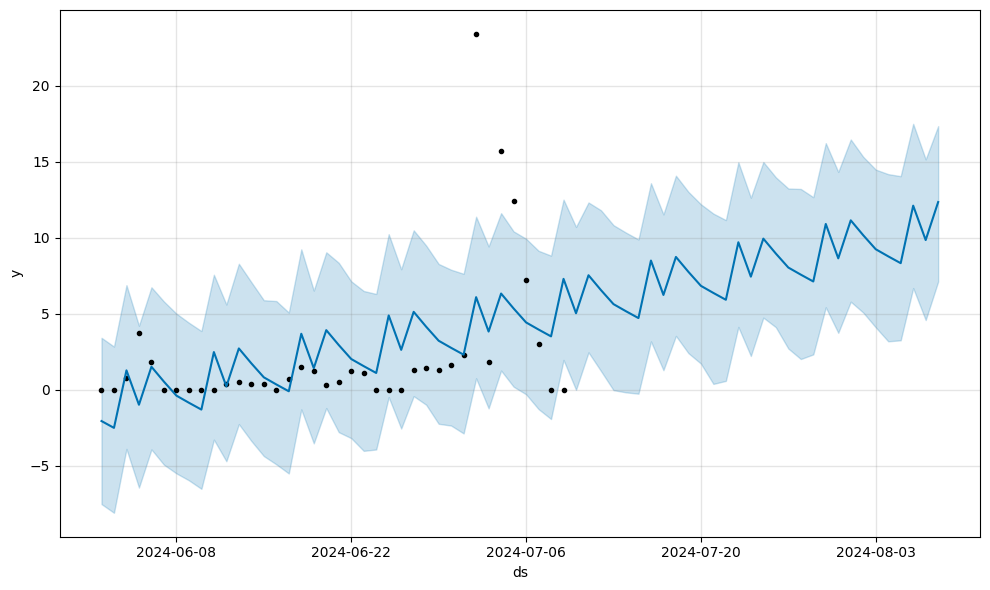

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with the correct delimiter
df = pd.read_csv('/content/open-meteo-33.62N73.25E610m.csv', delimiter=',')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'precipitation_sum (mm)' column as 'y'
df.rename(columns={'time': 'ds', 'precipitation_sum (mm)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')  # Ensure the date format is correct

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/forecast_results_PRECIPITATION.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/forecast_results_PRECIPITATION.csv'")

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/forecast_results_PRECIPITATION.csv')

# Check the columns in df_actual
print("Columns in df_actual:", df_actual.columns)

# Ensure the date column is correctly formatted
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # No need to specify the format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Columns in df_actual: Index(['ds', 'yhat'], dtype='object')
MAE: 1.1133069774713375e-16
MSE: 7.46447648001284e-32
RMSE: 2.732119411741156e-16


MAE: 33.729723060218696
MSE: 1167.769649481037
RMSE: 34.172644753970054


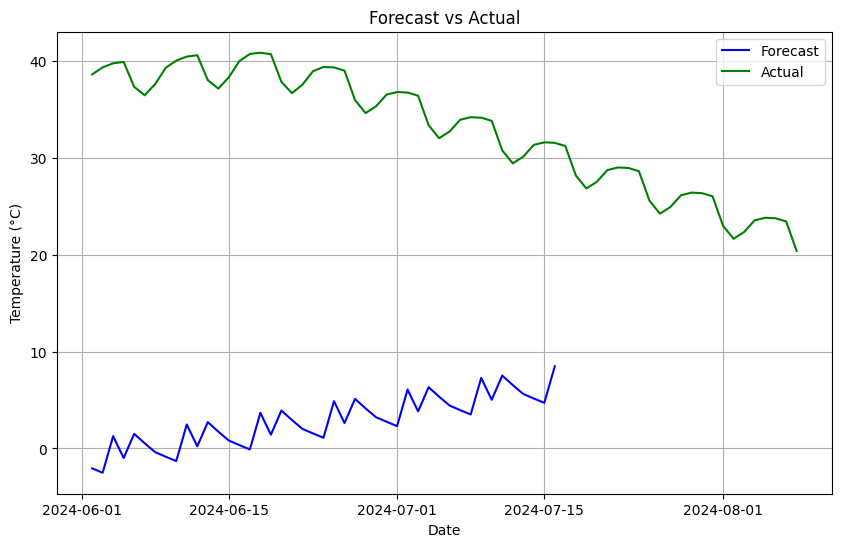

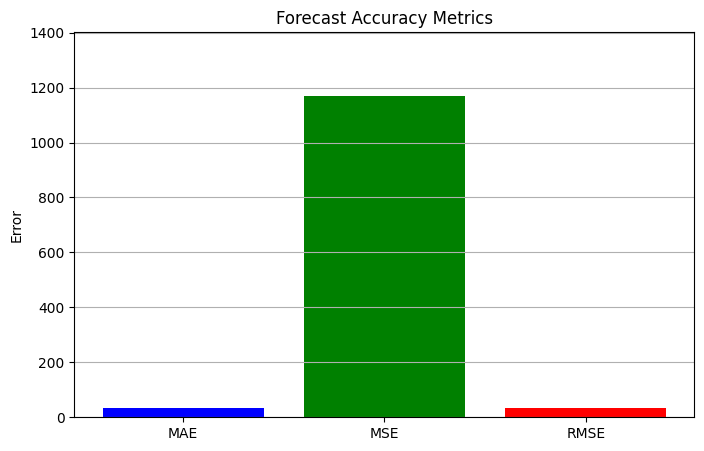

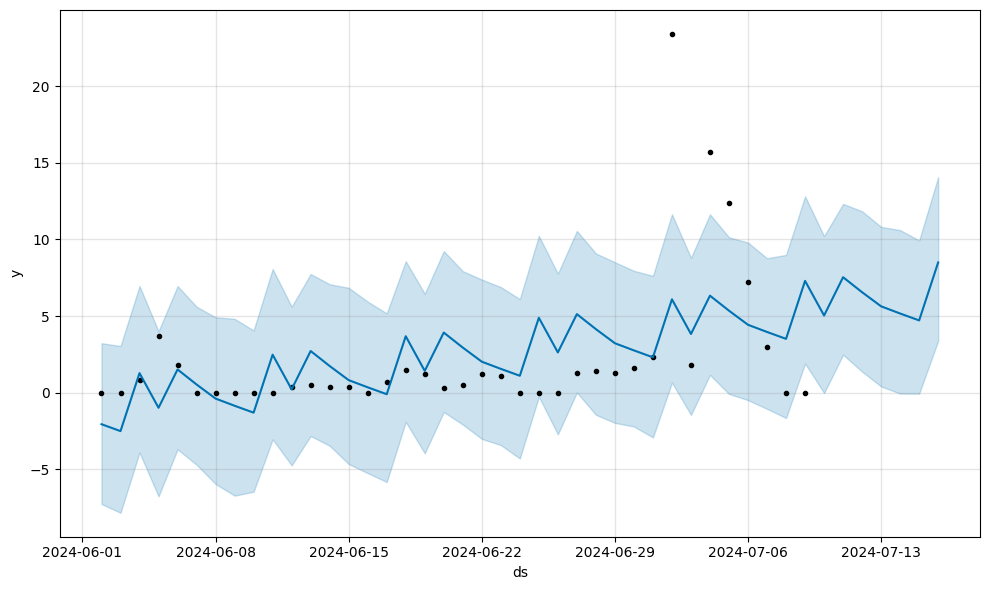

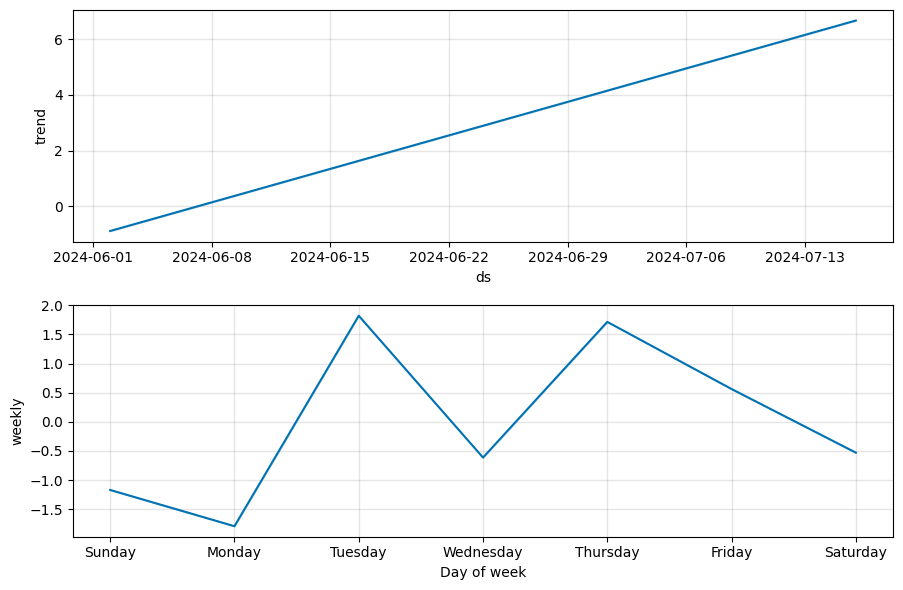

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/forecast_results.csv')
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # Ensure 'ds' is datetime format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting the forecast and metrics
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df_actual['ds'], df_actual['yhat'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


plot_components_plotly(m, forecast)

ALL OF THE ABOVE RESULTS ARE FOR PRICIPITATION